# Analyze System
The purpose of this notebook is to analyze the .csv files (results, data) created from predictsystem.ipynb, and generate candidates for full long Nbody simulations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Load data

In [2]:
system = "KOI-2086"    #KOI-0156, KOI-0168, KOI-2086

data = pd.read_csv("systems/%s_data.csv"%system)
results = pd.read_csv("systems/%s_results.csv"%system)
data.columns

Index([u'Unnamed: 0', u'm1', u'T1', u'P1', u'h1', u'k1', u'm2', u'T2', u'P2',
       u'h2', u'k2', u'm3', u'T3', u'P3', u'h3', u'k3'],
      dtype='object')

## Plot data

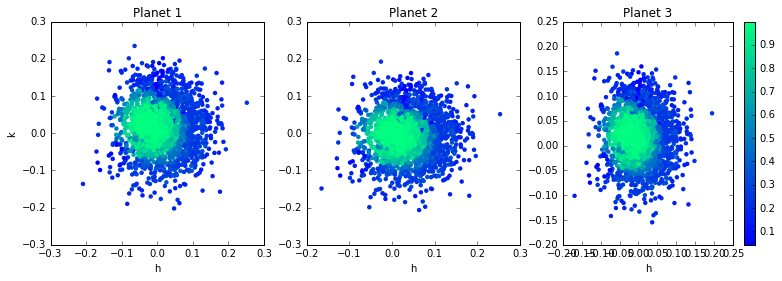

In [4]:
x = "h"
y = "k"
proba = results["predict_proba"].values

colorbar = 'winter'
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[13, 4])
ax1.scatter(data["%s1"%x][:len(proba)], data["%s1"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)
ax2.scatter(data["%s2"%x][:len(proba)], data["%s2"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)
c=ax3.scatter(data["%s3"%x][:len(proba)], data["%s3"%y][:len(proba)], c=proba, cmap=colorbar, lw=0)

ax1.set_ylabel(y) 
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax3.set_xlabel(x)
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")
cb = f.colorbar(c)
plt.savefig("images/%s_%s%s.png"%(system,x,y))

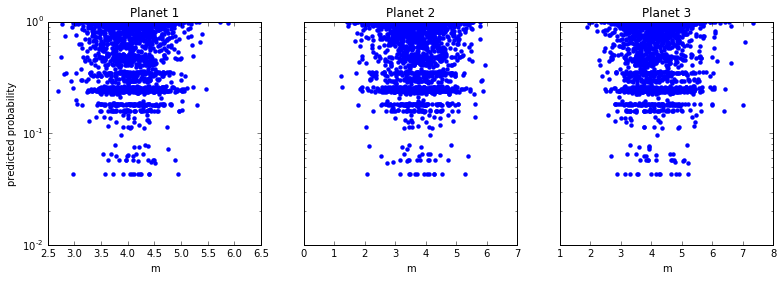

In [9]:
proba = results["predict_proba"].values

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[13, 4], sharey=True)
ax1.scatter(data["m1"][:len(proba)], proba, lw=0)
ax2.scatter(data["m2"][:len(proba)], proba, lw=0)
ax3.scatter(data["m3"][:len(proba)], proba, lw=0)

ax1.set_ylabel("predicted probability") 
ax1.set_yscale('log')
ax1.set_ylim([1e-2,1])
ax1.set_xlabel("m")
ax2.set_xlabel("m")
ax3.set_xlabel("m")
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")
plt.savefig("images/%s_mproba.png"%system)

## Get Nbody candidates
Randomly sample from three stability probability ranges (low, medium, high). 

In [3]:
N_samples = 201
random.seed(42)
i1 = random.sample(np.where((results["predict_proba"] > 0.6)&(results["predict_proba"] < 0.8))[0],N_samples/3)
i2 = random.sample(np.where((results["predict_proba"] > 0.95)&(results["predict_proba"] < 1))[0],N_samples/3)
i3 = random.sample(np.where((results["predict_proba"] > 0)&(results["predict_proba"] < 0.2))[0],N_samples/3)
index = np.concatenate((i1,i2,i3))

In [4]:
r = results.iloc[index]
d = data.iloc[index]

In [5]:
d.head()

,Unnamed: 0,m1,T1,P1,h1,k1,m2,T2,P2,h2,k2,m3,T3,P3,h3,k3
1237,1237,3.910662,782.277794,7.133449,0.054751,-0.014158,4.321187,786.581403,8.918429,0.076064,-0.037745,4.186236,780.281798,11.898349,0.035333,-0.006649
41,41,4.561262,782.281080,7.133235,0.077730,-0.020390,3.001425,786.582987,8.918708,0.094738,-0.041098,2.985368,780.279600,11.897977,0.060666,-0.014308
639,639,3.580101,782.282399,7.133492,0.034945,0.062636,4.400279,786.579197,8.918527,0.059375,0.032624,4.344453,780.282167,11.898251,0.020306,0.051386
521,521,3.461580,782.281419,7.133519,0.051895,0.057231,4.131677,786.583444,8.918638,0.073729,0.029825,3.785172,780.279632,11.897896,0.036392,0.047453
1374,1374,4.336313,782.276448,7.133283,0.046534,0.019264,3.123851,786.582990,8.918554,0.068214,-0.004995,4.575154,780.275023,11.898255,0.031968,0.019285


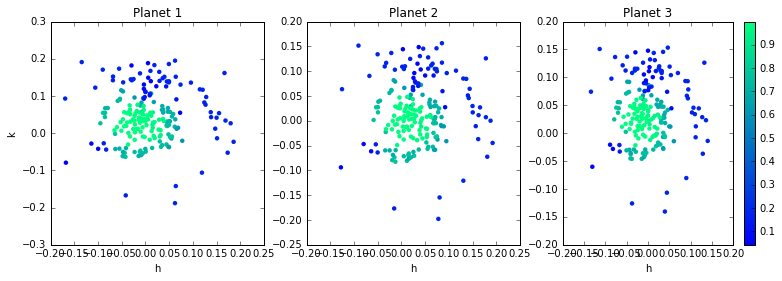

In [6]:
# Plot Nbody Candidates
x = "h"
y = "k"
proba = r["predict_proba"].values

colorbar = 'winter'
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[13, 4])
ax1.scatter(d["%s1"%x], d["%s1"%y], c=proba, cmap=colorbar, lw=0)
ax2.scatter(d["%s2"%x], d["%s2"%y], c=proba, cmap=colorbar, lw=0)
c=ax3.scatter(d["%s3"%x], d["%s3"%y], c=proba, cmap=colorbar, lw=0)

ax1.set_ylabel(y) 
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax3.set_xlabel(x)
ax1.set_title("Planet 1")
ax2.set_title("Planet 2")
ax3.set_title("Planet 3")
cb = f.colorbar(c)
plt.savefig("systems/%s_%s%s_Nbodycandidates.png"%(system,x,y))

In [7]:
d.to_csv("systems/%s_data_Nbodycandidates.csv"%system)
r.to_csv("systems/%s_results_Nbodycandidates.csv"%system)

## Generate Sunnyvale jobs

In [11]:
logorbits = 9            #10^logorbits number of orbits of innermost planet
dir = 'jobs/'

for sample in d.iterrows():
    index = sample[0]    #id number of sample
    job_name = "Nbodycandidates_1e%dorbits_sunnyrun%d"%(logorbits,index)
    sh_script_name = "%s%s"%(dir,job_name)
    with open(sh_script_name, 'w') as f:
        f_head = open('job_header_sunnyvale','r')
        f.write(f_head.read())
        f_head.close()
        f.write('#PBS -N %s \n'%job_name)
        f.write('# EVERYTHING ABOVE THIS COMMENT IS NECESSARY, SHOULD ONLY CHANGE nodes,ppn,walltime and my_job_name VALUES\n')
        f.write('cd $PBS_O_WORKDIR\n')      #This will be the home Stability/ directory
        f.write('python run_Nbody.py %d %d >& batch.output\n'%(index,logorbits))
    f.close()